# **KHANIF FAUZI PAMBUDI (MILESTONE 1 PHASE 2)**

Milestones   ini   dibuat   guna   mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program khususnya pada Artificial Neural Network. Dataset dapat diakses melalui link https://www.kaggle.com/blastchar/telco-customer-churn



# **Context**
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

# **Content**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:


*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

*   Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents

# **Feature Description**
* customerID : Customer ID
* gender : Whether the customer is a male or a female
* SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* Partner : Whether the customer has a partner or not (Yes, No)
* Dependents : Whether the customer has dependents or not (Yes, No)
* tenure : Number of months the customer has stayed with the company
* PhoneService : Whether the customer has a phone service or not (Yes, No)
* MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract : The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges : The amount charged to the customer monthly
* TotalCharges : The total amount charged to the customer
* Churn : Whether the customer churned or not (Yes or No)

# **IMPORT LIBRARY**

In [144]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import scipy.integrate as integrate
import scipy
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [145]:
tf.__version__

'2.6.0'

# **DATA LOADING**

In [146]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [147]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [148]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [149]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# **DATA EXPLORATION**

In [150]:
len(df)

7043

In [151]:
df.shape

(7043, 21)

In [152]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [154]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# **MISSING VALUE**

In [155]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak terdapat missing value pada dataset tersebut

# **EDA**

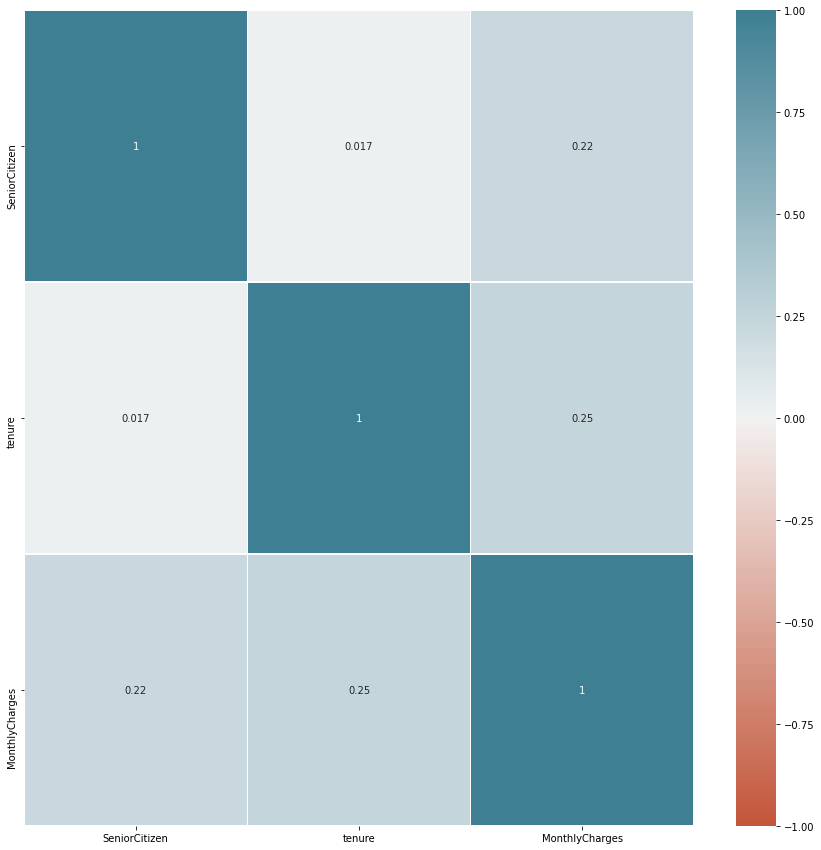

In [156]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)

In [157]:
num_dat=df[df.describe().columns.values]
cat_dat=df.drop(columns=df.describe().columns.values)

In [158]:
num_dat.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [159]:
cat_dat.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

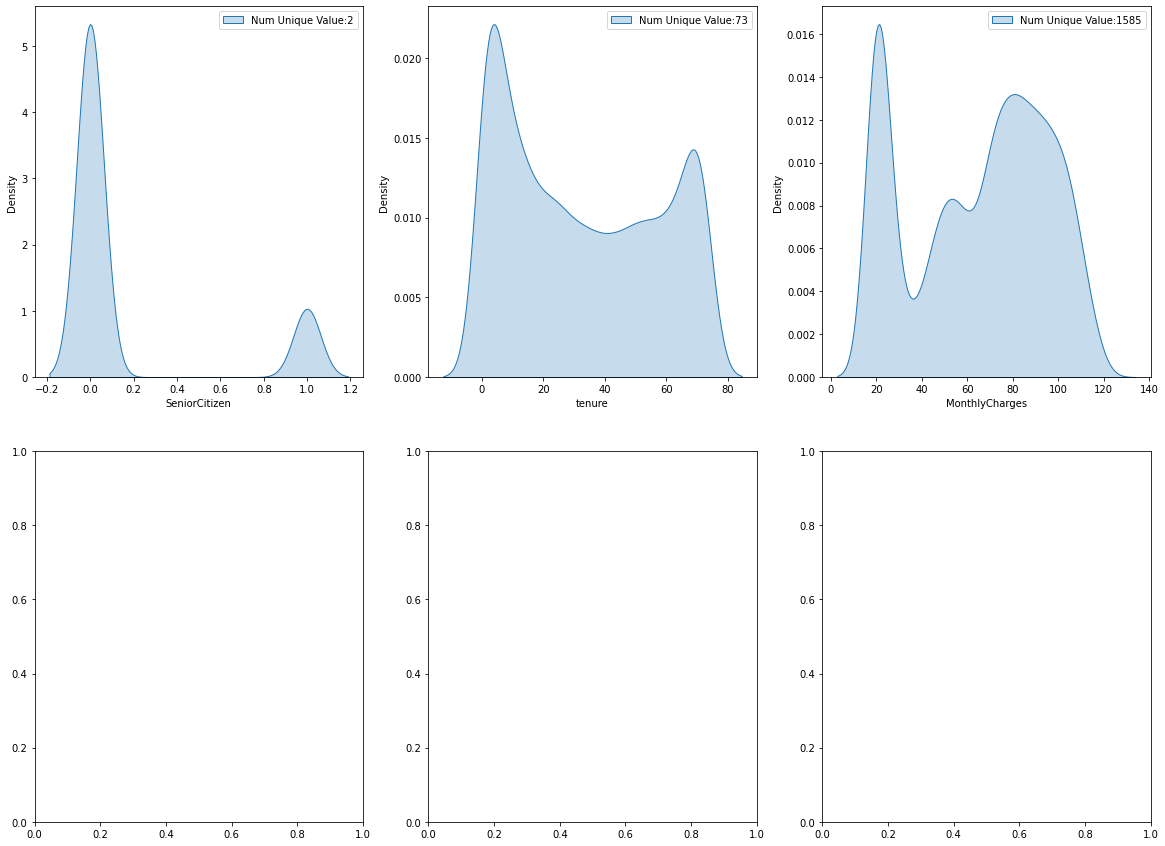

In [160]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,15))
i=0
j=0
for col in num_dat.columns:
    sns.kdeplot(data=num_dat, x=col, fill=True,ax=axes[i][j],label='Num Unique Value:{}'.format(len(num_dat[col].unique())))
    axes[i][j].legend()
    j+=1
    if j>2:
        i+=1
        j=0

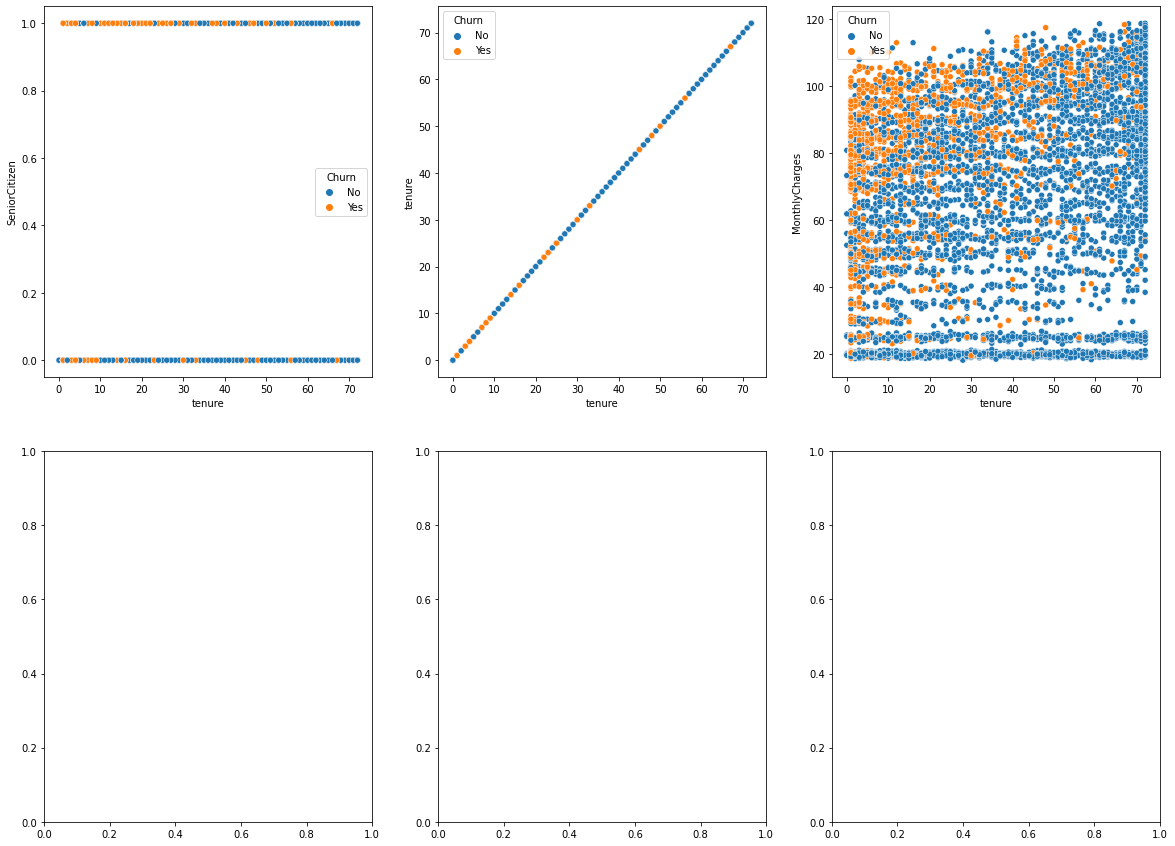

In [161]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,15))
i=0
j=0
for col in num_dat.columns:
    sns.scatterplot(data=df, x='tenure',y=col, hue='Churn',ax=axes[i][j])
    #axes[i][j].legend()
    j+=1
    if j>2:
        i+=1
        j=0

**Persebaran Target Data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '26.54 % (1869 nos) of cust will churn & 73.46 % (5174 nos) of cust will retain')

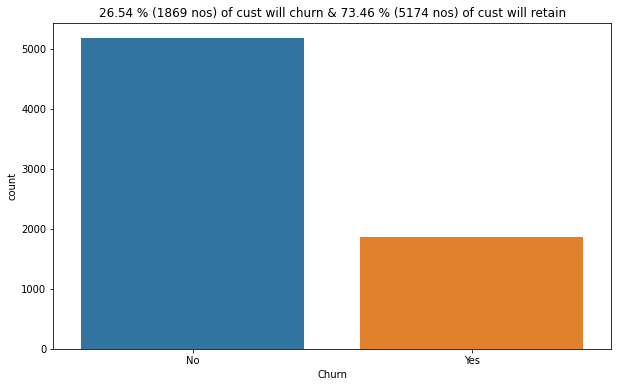

In [162]:
# Count of customer that will churn
cust_churn_yes_count = df[df.Churn == 'Yes'].shape[0]
# Count of customer that will not churn (retain)
cust_churn_no_count = df[df.Churn == 'No'].shape[0]

# Percentage of customer that will churn
cust_churn_yes_percent = round((cust_churn_yes_count / (cust_churn_yes_count + cust_churn_no_count) * 100),2)
# Percentage of customer that will not churn (retain)
cust_churn_no_percent = round((cust_churn_no_count / (cust_churn_yes_count + cust_churn_no_count) * 100 ),2)

plt.figure(figsize=(10,6))
ax = sns.countplot(df['Churn'])
ax.set_title(f'{cust_churn_yes_percent} % ({cust_churn_yes_count} nos) of cust will churn & {cust_churn_no_percent} % ({cust_churn_no_count} nos) of cust will retain')

Text(0.5, 1.0, 'Effect of Gender on customer churn')

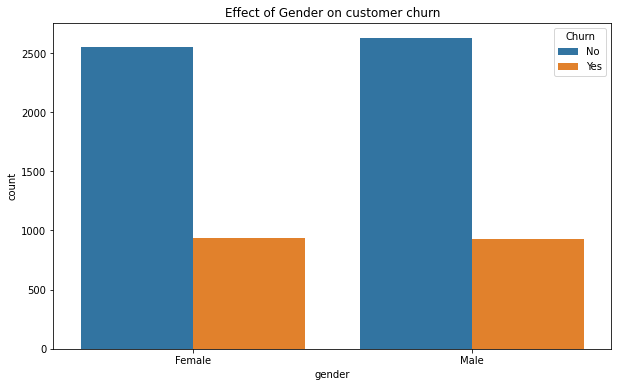

In [163]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'gender', hue='Churn', data=df)
ax.set_title(f'Effect of Gender on customer churn')

Text(0.5, 0, 'SeniorCitizens(0: No, 1: Yes)')

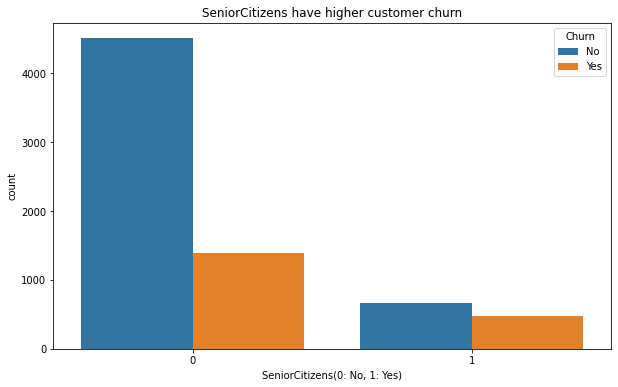

In [164]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'SeniorCitizen', hue='Churn', data=df)
ax.set_title(f'SeniorCitizens have higher customer churn')
plt.xlabel('SeniorCitizens(0: No, 1: Yes)')

Text(0.5, 1.0, 'Effect of internet service on customer churn')

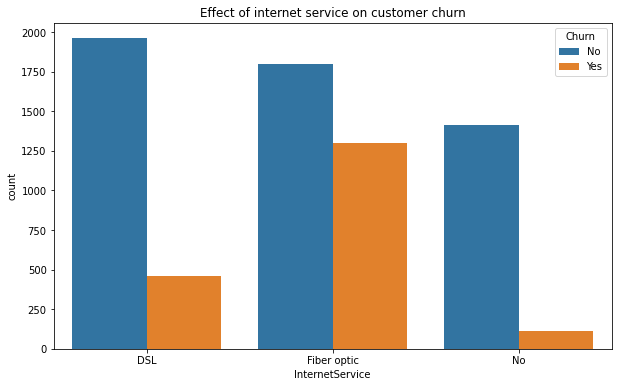

In [165]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'InternetService', hue='Churn', data=df)
ax.set_title(f'Effect of internet service on customer churn')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


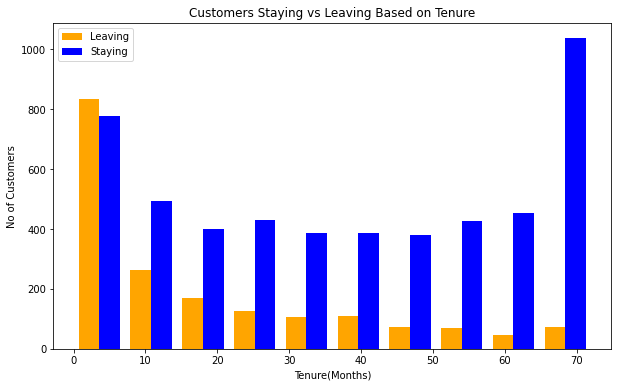

In [166]:
tenure_churn_yes = df[df.Churn == 'Yes'].tenure
tenure_churn_no = df[df.Churn == 'No'].tenure

plt.figure(figsize=(10,6))
plt.hist([tenure_churn_yes, tenure_churn_no], color=['orange', 'blue'], label= ['Leaving', 'Staying'])
plt.xlabel('Tenure(Months)')
plt.ylabel('No of Customers')
plt.title('Customers Staying vs Leaving Based on Tenure')
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


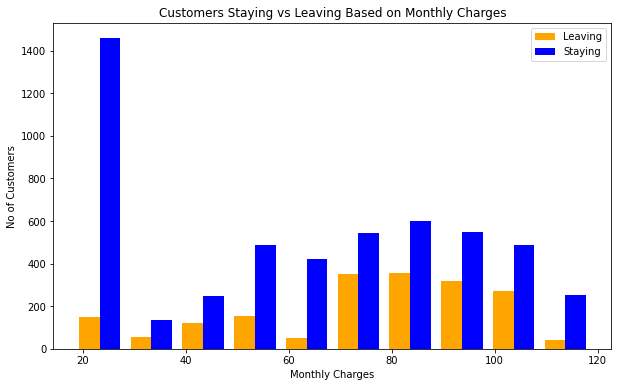

In [167]:
monthly_charges_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges
monthly_charges_churn_no = df[df.Churn == 'No'].MonthlyCharges


plt.figure(figsize=(10,6))
plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], color=['orange', 'blue'], label= ['Leaving', 'Staying'])
plt.xlabel('Monthly Charges')
plt.ylabel('No of Customers')
plt.title('Customers Staying vs Leaving Based on Monthly Charges')
plt.legend()

# **EDA ANALYSIS**

Setelah dilakukan eksplorasi data, didapat hasil analisa sebagai berikut

*   untuk data numerikal masih terdapat skewed
*   dari hubungan data kategorikal dengan numerikal dapat disimpulkan untuk nilai tenure yang lebih kecil memiliki kecenderungan untuk diprediksi ke target 1 atau yes dan untuk nilai tenure yang lebih besar memiliki kecenderungan untuk diprediksi ke target 0 atau no

*   fitur gender tidak memiliki pengaruh terhadap target karena antara gender male dan female memiliki kecenderungan yang sama
*   untuk fitur senior citizens dengan value no memiliki kecenderungan untuk mengarah ke target karena persebaran datanya lebih banyak dibandingkan dengan senior ciizens dengan value yes

*   Untuk internet services yang menggunakan fiber optics memiliki kecenderungan untuk mengarah ke target 1 atau yes dibandingkan dengan DSL maupun yang tidak menggunakan internet services
*   semakin besar nilai tenure maka akan ada kecenderungan untuk stay

*   semakin besar monthly charge maka akan ada kemungkinan untuk stay









# **DATA PREPROCESSING**

In [168]:
#Menghapus fitur customerID
df.drop('customerID', axis='columns', inplace= True)

In [169]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [170]:
df.TotalCharges.values #value berupa string

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [171]:
df.MonthlyCharges.values #value berupa number

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [172]:
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [173]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [174]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [175]:
df.shape

(7043, 20)

In [176]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [177]:
df.iloc[488]['TotalCharges']

' '

In [178]:
df1 = df[df.TotalCharges!= ' ']

In [179]:
df1.shape

(7032, 20)

In [180]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [181]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [182]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [183]:
df1.TotalCharges.dtypes

dtype('float64')

In [184]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [185]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


**Visualisasi Data**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


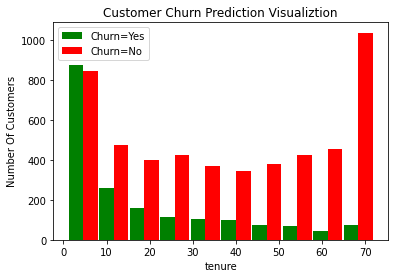

In [186]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


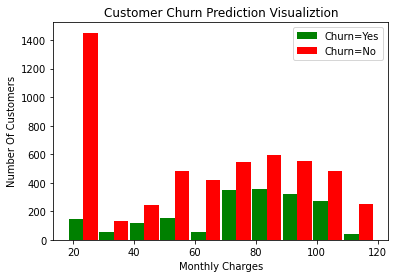

In [187]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

# **FEATURE ENGINEERING DAN PIPELINE**

In [188]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [189]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [190]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [191]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes dan No menjadi 1 dan 0**

In [192]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [193]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [194]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [195]:
df1.gender.unique()

array([1, 0])

**Melakukan OneHotEncoding untuk kolom kategorikal**

In [196]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [197]:
df2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2481,0,1,1,0,61,1,1,0,0,0,0,0,0,0,25.00,1501.75,0,0,0,1,0,0,1,1,0,0,0
6784,1,0,0,0,19,1,1,0,0,0,0,0,0,0,24.70,465.85,0,0,0,1,1,0,0,1,0,0,0
6125,0,0,1,0,13,1,1,0,0,1,0,1,1,1,102.25,1359.00,1,0,1,0,1,0,0,0,1,0,0
3052,0,0,1,0,37,1,1,1,0,0,0,0,0,1,55.05,2030.75,0,1,0,0,1,0,0,0,0,0,1
4099,1,0,0,0,6,0,0,1,0,0,0,0,0,0,29.45,161.45,0,1,0,0,1,0,0,1,0,0,0
3223,0,0,1,0,3,0,0,0,1,0,0,0,0,0,29.80,94.40,0,1,0,0,1,0,0,0,1,0,0
3774,0,1,1,1,52,1,1,0,1,1,0,1,1,1,80.85,4079.55,0,1,0,0,0,1,0,0,0,1,0
3469,1,1,0,0,15,1,0,0,0,0,0,1,1,1,91.50,1400.30,0,0,1,0,1,0,0,0,0,1,0
3420,1,0,0,0,26,1,1,1,1,0,0,1,0,1,69.50,1800.05,0,1,0,0,1,0,0,1,0,0,0
1196,0,0,1,0,66,1,1,1,1,0,1,1,1,0,85.25,5538.35,0,1,0,0,0,0,1,0,0,1,0


In [198]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [199]:
#Melakukan scale pada kolom tenure, monthlycharges, dan total charges
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

**Scale Fitur Menggunakan Pipeline**

In [200]:
#melakukan scale menggunakan pipeline

minmax = ['tenure','MonthlyCharges','TotalCharges']
df_dummies_minmax= pd.DataFrame(df2, columns=minmax)
df_dummies_remain= df2.drop( columns=minmax)

minmax_trans = Pipeline([('scaler', MinMaxScaler())])

scaled = minmax_trans.fit_transform(df_dummies_minmax)

df_dummies_scaled=pd.DataFrame(scaled,columns=minmax,index=df_dummies_remain.index)

df_dummies= pd.concat([df_dummies_remain,df_dummies_scaled], axis=1)

In [201]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# **SPLIT DATA**

In [202]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [203]:
X_train.shape

(5625, 26)

In [204]:
X_test.shape

(1407, 26)

In [205]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,0,0,1,1,0.660199,0.097709,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,0,0,0,0,0.011940,0.000075,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,1,1,1,1,0.605473,0.639978,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.259204,0.008135,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,0,1,1,1,0.808458,0.685703,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,1,0,0,0,0.367164,0.083556,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,0,0,0,0,0.107960,0.077221,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,1,0,0,1,0.420398,0.360760,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,1,0,0,0,0.121891,0.011493,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,0,0,0,0,0.072637,0.216859,0,0,1,0,0,1,1,0,0,0


In [206]:
len(X_train.columns)

26

# **MEMBUAT MODEL ANN (ARTIFICIAL NEURAL NETWORK)**

In [207]:
import tensorflow as tf
from tensorflow import keras

#model API
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4946 - accuracy: 0.7548
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.7892
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8004
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8007
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8043
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8048
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8069
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8069
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8060
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4027 - accura

In [208]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                405       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


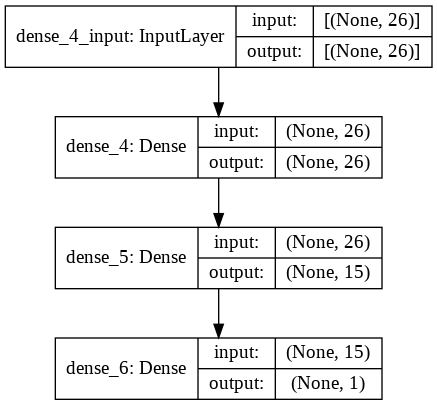

In [209]:
keras.utils.plot_model(model, "model_function.png", show_shapes=True)

# **TRAINING AND EVALUATING MODEL**

In [210]:
his = model.fit(X_train,y_train,batch_size=30,epochs=100,validation_split=0.2)

Epoch 1/100
150/150 [==============================] - 1s 4ms/step - loss: 0.3420 - accuracy: 0.8378 - val_loss: 0.3563 - val_accuracy: 0.8187
Epoch 2/100
150/150 [==============================] - 0s 3ms/step - loss: 0.3386 - accuracy: 0.8376 - val_loss: 0.3617 - val_accuracy: 0.8213
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8384 - val_loss: 0.3660 - val_accuracy: 0.8116
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8433 - val_loss: 0.3683 - val_accuracy: 0.8213
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8376 - val_loss: 0.3693 - val_accuracy: 0.8178
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8409 - val_loss: 0.3758 - val_accuracy: 0.8151
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8393 - val_loss: 0.3786 - val_accuracy: 0.8089

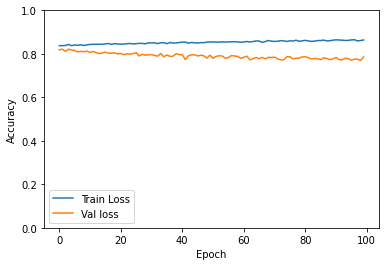

In [211]:
import matplotlib.pyplot as plt


def plot_history(his):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(his.epoch, np.array(his.history['accuracy']),
           label='Train Loss')
  plt.plot(his.epoch, np.array(his.history['val_accuracy']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 1])

plot_history(his)

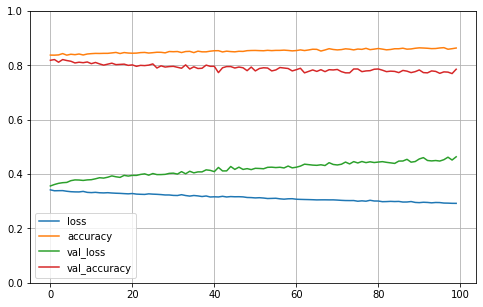

In [212]:
import pandas as pd

pd.DataFrame(his.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# **MODEL EVALUATION**

In [213]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.7484


[0.6036587953567505, 0.748400866985321]

In [214]:
yp = model.predict(X_test)
yp[:10]

array([[8.2039654e-02],
       [5.5213523e-01],
       [3.1778216e-04],
       [7.7214599e-01],
       [2.4336714e-01],
       [6.2474000e-01],
       [8.4196031e-02],
       [1.4878544e-01],
       [2.5479057e-01],
       [1.6875565e-03]], dtype=float32)

In [215]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [216]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [217]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

Text(69.0, 0.5, 'Truth')

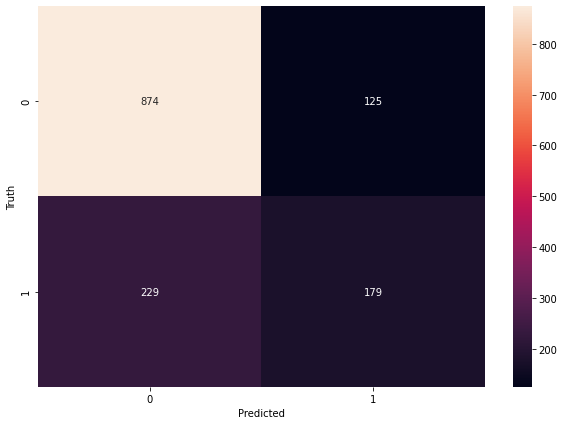

In [218]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [219]:
y_test.shape

(1407,)

**Hasil Akurasi**

In [253]:
round((874+179)/(874+179+229+125),2)

0.75

**Hasil Precision untuk Kelas 0**

In [254]:
round(874/(874+229),2)

0.79

**Hasil Precision untuk Kelas 1**

In [255]:
round(179/(179+125),2)

0.59

**Hasil Recall untuk Kelas 0**

In [256]:
round(874/(874+125),2)

0.87

**Hasil Recall untuk Kelas 1**

In [257]:
round(179/(179+229),2)

0.44

# **MODEL IMPROVEMENT**

In [225]:
from keras.models import Sequential, load_model
from keras import layers
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint

In [226]:
nn = Sequential()
Input_Shape =  X_train.shape[1]

nn.add(layers.Dense(1024, input_shape=(Input_Shape, ), activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1024, activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              27648     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1025      
Total params: 1,078,273
Trainable params: 1,078,273
Non-trainable params: 0
_________________________________________________________________


In [227]:
#callback best model
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only= True)

In [228]:
fit_nn = nn.fit(X_train, y_train,
                epochs = 100,
                verbose = False,
                validation_data = (X_test, y_test),
                batch_size = 30, callbacks=[mc])
best_nn = load_model('best_model.h5')

In [229]:
accuracy = best_nn.evaluate(X_train, y_train, verbose = False)
print("Best Model Training Score: {: .4f}".format(accuracy[0]))
print("Best Model Training Accuracy: {: .4f}".format(accuracy[1]))

accuracy = best_nn.evaluate(X_test, y_test, verbose = False)
print("Best Model Training Score: {: .4f}".format(accuracy[0]))
print("Best Model Training Accuracy: {: .4f}".format(accuracy[1]))

accuracy = nn.evaluate(X_train, y_train, verbose = False)
print("Final Model Training Score: {: .4f}".format(accuracy[0]))
print("Final Model Training Accuracy: {: .4f}".format(accuracy[1]))


accuracy = nn.evaluate(X_test, y_test, verbose = False)
print("Final Model Training Score: {: .4f}".format(accuracy[0]))
print("Final Model Training Accuracy: {: .4f}".format(accuracy[1]))


Best Model Training Score:  0.4010
Best Model Training Accuracy:  0.8112
Best Model Training Score:  0.4461
Best Model Training Accuracy:  0.7939
Final Model Training Score:  0.0889
Final Model Training Accuracy:  0.9568
Final Model Training Score:  1.6843
Final Model Training Accuracy:  0.7377


In [230]:
def plot_history(fit_keras):
  acc = fit_keras.history['accuracy']
  val_acc  = fit_keras.history['val_accuracy']
  loss = fit_keras.history['loss']
  val_loss = fit_keras.history['val_loss']
  x = range(1, len(acc) + 1)
  
  plt.figure(figsize=(14,7))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'b', label='Training Acc')
  plt.plot(x, val_acc, 'r', label='Testing Acc')
  plt.title('Training & Testing Accuracy')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training Loss')
  plt.plot(x, val_loss, 'r', label='Testing Loss')
  plt.title('Training & Testing Accuracy')
  plt.legend()

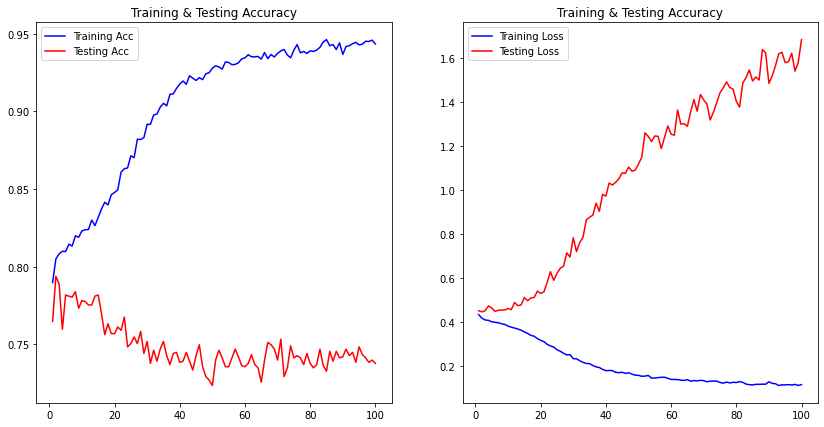

In [231]:
plot_history(fit_nn)

# **GRID SEARCH**

In [232]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [238]:
def create_model(activation='relu',optimizer='adam',init_mode = 'normal'):
  model = Sequential()
  model.add(keras.layers.Dense(26, input_dim=(26),kernel_initializer=init_mode, activation=activation))
  model.add(keras.layers.Dense(15,kernel_initializer=init_mode, activation=activation))
  model.add(keras.layers.Dense(1,kernel_initializer=init_mode, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [239]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [240]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [241]:
epochs = [10, 30, 50, 100]
init_mode = ['normal', 'glorot_normal']
optimizer = ['Adam', 'Adamax']
activation = ['relu', 'sigmoid']
param_grid = dict(optimizer=optimizer, activation=activation, init_mode=init_mode,epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [242]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.801600 (0.005711) with: {'activation': 'relu', 'epochs': 10, 'init_mode': 'normal', 'optimizer': 'Adam'}
0.798756 (0.009633) with: {'activation': 'relu', 'epochs': 10, 'init_mode': 'normal', 'optimizer': 'Adamax'}
0.802311 (0.004229) with: {'activation': 'relu', 'epochs': 10, 'init_mode': 'glorot_normal', 'optimizer': 'Adam'}
0.797511 (0.006751) with: {'activation': 'relu', 'epochs': 10, 'init_mode': 'glorot_normal', 'optimizer': 'Adamax'}
0.803200 (0.006444) with: {'activation': 'relu', 'epochs': 30, 'init_mode': 'normal', 'optimizer': 'Adam'}
0.801600 (0.007274) with: {'activation': 'relu', 'epochs': 30, 'init_mode': 'normal', 'optimizer': 'Adamax'}
0.794133 (0.007248) with: {'activation': 'relu', 'epochs': 30, 'init_mode': 'glorot_normal', 'optimizer': 'Adam'}
0.801422 (0.008459) with: {'activation': 'relu', 'epochs': 30, 'init_mode': 'glorot_normal', 'optimizer': 'Adamax'}
0.796800 (0.011111) with: {'activation': 'relu', 'epochs': 50, 'init_mode': 'normal', 'optimizer': 'Adam'}
0

In [243]:
best_grid=grid_result.best_estimator_

In [244]:
best_grid

# **MODEL INFERENCE**

In [249]:
model_inference=keras.models.load_model("best_model.h5")

In [250]:
model_inference.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              27648     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1025      
Total params: 1,078,273
Trainable params: 1,078,273
Non-trainable params: 0
_________________________________________________________________


In [252]:
y_predict = model_inference.predict(X_test)
y_pred =[]
for element in y_predict:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
pred_randfor =[]        
pred_randfor.append(y_pred)

pred_rf = pd.DataFrame({
    "Target":y_test,
    "Predict":pred_randfor[0]
})
pred_rf

,Target,Predict
2660,0,0
744,0,0
5579,1,0
64,1,1
3287,1,0
...,...,...
2024,0,0
4396,1,1
4081,1,1
1297,0,1


In [258]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       999
           1       0.67      0.57      0.62       408

    accuracy                           0.79      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.79      0.79      0.79      1407



# **MODEL ANALYSIS**

Setelah dilakukan training dan testing menggunakan model artificial neural network didapatkan hasil analisa sebagai berikut

*   Hasil akurasi pada pemodelan pertama menghasilkan nilai akurasi sebesar 0.75 dengan nilai precision pada kelas 0 sebesar 0.79 dan precision pada kelas 1 sebesar 0.59 kemudian nilai recall pada kelas 0 sebesar 0.87 dan nilai recall pada kelas 1 sebesar 0.44
*   Hasil yang kurang baik pada kelas 1 dikarenakan terjadinya imbalance data pada persebaran target di dataset dimana kelas 0 merupakan kelas yang paling dominan

*   Kemudian dilakukan model improvement dengan melakukan dropout untuk mendapatkan model terbaik dengan menghasilkan akurasi pada training data sebesar 0.9568 namun hasil akurasi pada testing data tidak lebih baik hanya sebesar 0.7377
*   Selain model improvement dengan dropout dilakukan juga model improvement pada gridsearch yang menghasilkan nilai akurasi yang baik namun dalam proses pengerjaannya grid search memerlukan waktu running yang cukup lama

*   walaupun model neural network membutuhkan waktu untuk dilatih, yang bisa jadi lebih sulit dari biasanya akan tetapi di sisi lain, mencoba model baru sangat menyenangkan karena kita dapat melihat bagaimana model tersebut dapat membawa wawasan baru untuk memecahkan masalah bisnis.





